What is sentiemnt anyslis

What are we doing in this project

![ChessUrl](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif "chess")


In [52]:
import pandas as pd
import numpy as np

#imports to plot bar and line graphs
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox, TextArea)
from matplotlib.patches import ArrowStyle 

#imports to preprocess the tweet data
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#imports to train machine learning models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#import to get stock data
from yahoo_fin.stock_info import get_data

# Importing the data
Using pandas libbray, I am reading a csv file and converting it to a dataframe. I save the number of postive and negative tweets I have in varibles, because I will use them in the next section.

In [53]:
df_nonClean = pd.read_csv("Financial Tweets.csv", encoding='iso-8859-1')
pos_tweet_count_before = len(df_nonClean.loc[df_nonClean['Sentiment'] == 'positive'])
neg_tweet_count_before = len(df_nonClean.loc[df_nonClean['Sentiment'] == 'negative'])
df_nonClean

,Sentiment,Tweets
0,negative,is upset that he can't update his Facebook by ...
1,negative,@Kenichan I dived many times for the ball. Man...
2,negative,my whole body feels itchy and like its on fire
3,negative,"@nationwideclass no, it's not behaving at all...."
4,negative,@Kwesidei not the whole crew
...,...,...
1048570,positive,My GrandMa is making Dinenr with my Mum
1048571,positive,Mid-morning snack time... A bowl of cheese noo...
1048572,positive,@ShaDeLa same here say it like from the Termi...
1048573,positive,@DestinyHope92 im great thaanks wbuu?


# Resizing the Data
This data has 2 problems.
    
    1) This data has 1.4 million tweets. It will take a long for my laptop to process 1.4 million tweets.
    
    2) This also have a uneven amount of postive and negative tweets. If I run the data without balancing it out, the model will be baised towards negative tweets.

To solve the problem, I will first split the data set into two smaller data sets called "df_nonClean_pos" that represent postive tweets, and "df_nonClean_neg" that represent negative tweets. Then I will take a random sample of 25,000 tweets from each data sets and then combine the two data sets again. So now, I will have a data set of 50,000 tweets, with 25,000 negative and 25,000 positive tweets.

In [54]:
df_nonClean_pos = df_nonClean.loc[df_nonClean['Sentiment'] == "positive"]
df_nonClean_neg = df_nonClean.loc[df_nonClean['Sentiment'] == "negative"]

df_nonClean_pos = df_nonClean_pos.sample(frac=25000/df_nonClean_pos.shape[0])
df_nonClean_neg = df_nonClean_neg.sample(frac=25000/df_nonClean_neg.shape[0])

df_nonClean = pd.concat([df_nonClean_pos, df_nonClean_neg])


<Figure size 1152x288 with 0 Axes>

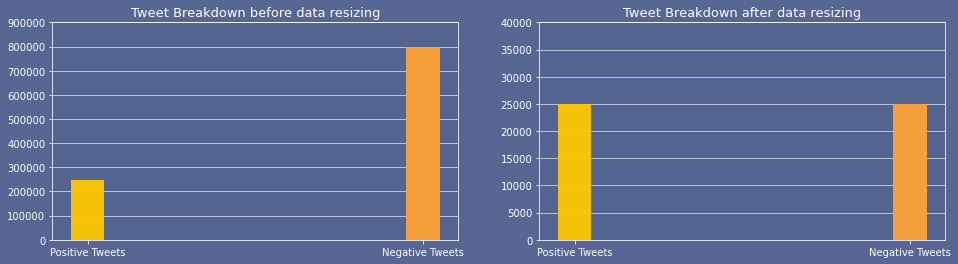

In [55]:
def plot_my_bargraph(ax, pos_c, neg_c, ymax, title):
    plt.rcParams["figure.figsize"] = [16, 4]
    plt.rc('axes', titlesize=13)
    ax.set_facecolor('#536490')
    ax.set_ylim(0, ymax)
    ax.grid(axis = 'y', zorder = '1', c = 'w', alpha = 1, lw = .6)
    ax.spines['bottom'].set_color('w')
    ax.spines['top'].set_color('w')
    ax.spines['right'].set_color('w')
    ax.spines['left'].set_color('w')
    ax.tick_params(axis='x', colors='w')
    ax.tick_params(axis='y', colors='w')
    ax.yaxis.label.set_color('w')
    ax.xaxis.label.set_color('w')
    ax.title.set_color('w')
    ax.set_title(title)
    ax.bar(["Positive Tweets", "Negative Tweets"], [pos_c, neg_c], color = ['#ffc801', '#ffa238'],width = .1, zorder = 3, alpha = .95)

pos_tweet_count = len(df_nonClean.loc[df_nonClean['Sentiment'] == 'positive'])
neg_tweet_count = len(df_nonClean.loc[df_nonClean['Sentiment'] == 'negative'])
fig = plt.figure(facecolor='#576692')
fig, ax = plt.subplots(1, 2, facecolor='#576692')
plot_my_bargraph(ax[0], pos_tweet_count_before, neg_tweet_count_before, 900000, 'Tweet Breakdown before data resizing')
plot_my_bargraph(ax[1], pos_tweet_count, neg_tweet_count, 40000, "Tweet Breakdown after data resizing")

Why is cleanign the data important?

What are u cleaning the data

In [56]:
#cleaning the tweets
def words_to_label(s):
    if s == "negative":
        return 0
    elif s ==  "positive":
        return 1

def clean_tweets(tweet):
    tweet = tweet. lower()
    tweet = re.sub("@[A-Za-z0-9]*", "", tweet)
    tweet = re.sub("["+string.punctuation+"]", "", tweet)
    tweet_tokens = word_tokenize(tweet)
    
    sw = stopwords.words("english")
    tweet_tokens_filtered = []
    for token in tweet_tokens:
        if token not in sw and token.isalpha():
            tweet_tokens_filtered.append(token)
            
    tweet = " ".join(tweet_tokens_filtered)
    return tweet

In [57]:
df_nonClean["Label"] = df_nonClean["Sentiment"].apply(words_to_label)
df_nonClean["Clean Tweets"] = df_nonClean["Tweets"].apply(clean_tweets)
df_clean = df_nonClean.drop(columns=["Sentiment", "Tweets"]).copy()
df_clean

,Label,Clean Tweets
814442,1,find twitter application palm centro thanks
942432,1,bought mileys cardigan
920307,1,nephews birthday party fun times lol xx
959976,1,well proportionally less messy cunning plan wo...
821114,1,wow carpet cleaning loud got good deal though
...,...,...
555080,0,tried cup tea good
744655,0,im trying get back twitter thingnot going well
249560,0,loss mom hospital lets see much lose breakup g...
143784,0,god damn itsix flags today fml


# Machine Learning
**Vectorzing the data**

**Traning and Testing the models**
First, I pass in the  clean vectorzied trainning data (tweet and setiemtn) to the model. Then I pass in clean vectorzied testing data, but this time I only pass in the tweets. I store the predecitons and comapre them to actual sentiemtn of the tweet. 
Each model has many parremnt, that I can fine tune. In this example, I am just using the standard models.
*MultinomialNB*
*SGDClassifier*
*LogisticRegression*

In [58]:
my_tfidfVectorizer = TfidfVectorizer(use_idf=True)
X = my_tfidfVectorizer.fit_transform(df_clean["Clean Tweets"])
y = df_clean["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
classifier_multinomialNB = MultinomialNB()
classifier_multinomialNB.fit(X_train, y_train)

predictions = classifier_multinomialNB.predict(X_test)

print(accuracy_score(y_test, predictions))

0.7481


In [60]:
classifier_SGDClassifier = SGDClassifier()
classifier_SGDClassifier.fit(X_train, y_train)

predictions = classifier_SGDClassifier.predict(X_test)

print(accuracy_score(y_test, predictions))

0.7539


In [61]:
classifier_LR_model = LogisticRegression(max_iter=1000)
classifier_LR_model.fit(X_train, y_train)

predictions = classifier_LR_model.predict(X_test)

print(accuracy_score(y_test, predictions))

0.7584


The Logistic Regression model perfoermed the best with a acurracy score of 75.66 %

# Why does this matter
Bellow 2 examples og how tweets directly affected stocks. The intresting thing is that this affect could have been forcested by regular sentiment annaylis. If a company used sentiment anyslsi on mutiple platforsm, such as Tweitter, Youtube, Facebook, Instagram and other social media plaforms, they could have predicted the general stigma towards there company. If the stigma was negative, they could have put out a statmnt or do somethign else, that would minise the effects on their comapy. 

Bellow i have two examples that show how twitter affected stocsk. my simpel model aculey predecited the sentiemnt of each tweet and using matplotlib, I showed how the tweet affected stocks. 

In [62]:
def test_new_tweet(tweet):
    tweet_clean = clean_tweets(tweet)
    test_tweet = my_tfidfVectorizer.transform([tweet_clean])
    test_predict = classifier_LR_model.predict(test_tweet)
    print("Tweet: \''", tweet, "\''", sep='')
    if test_predict == 0:
        print("The tweet is negative")
    elif test_predict == 1:
        print("The tweet is postive")

def my_plot(ax, x_values, y_values, x_label, y_lable, title, tweetDate, y_value_at_tweet_date, image_name, img_offset, arrow_offset):
    plt.rc('axes', titlesize=15)     # fontsize of the axes title
    plt.rcParams["figure.figsize"] = [16,6]
    img = plt.imread(image_name, format='png')
    img = OffsetImage(img, zoom=.1)
    img = AnnotationBbox(img, [tweetDate,  y_value_at_tweet_date], xybox=img_offset, xycoords='data', boxcoords='offset pixels', pad=0,box_alignment=(0, 1), frameon=False)
    arrow = TextArea("")
    arrow = AnnotationBbox(arrow, [tweetDate,  y_value_at_tweet_date], xybox=arrow_offset, xycoords='data', pad=-10, boxcoords='offset pixels', frameon=False, arrowprops=dict(arrowstyle='->',color='w', ))
    ax.add_artist(img)
    ax.add_artist(arrow)
    ax.set_facecolor('#FA8769')
    ax.plot(x_values, y_values, '-o', color = "#D94E48", linewidth=3, markersize=8)
    ax.axvline(tweetDate, linestyle =  ':', color = 'w')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_lable)
    ax.set_title(title)
    ax.xaxis.set_tick_params(rotation=30, labelsize=10)
    ax.yaxis.set_tick_params(labelsize=10)

Tweet: ''Sooo does anyone else not open Snapchat anymore? Or is it just me... ugh this is so sad,''
The tweet is negative


<Figure size 1152x288 with 0 Axes>

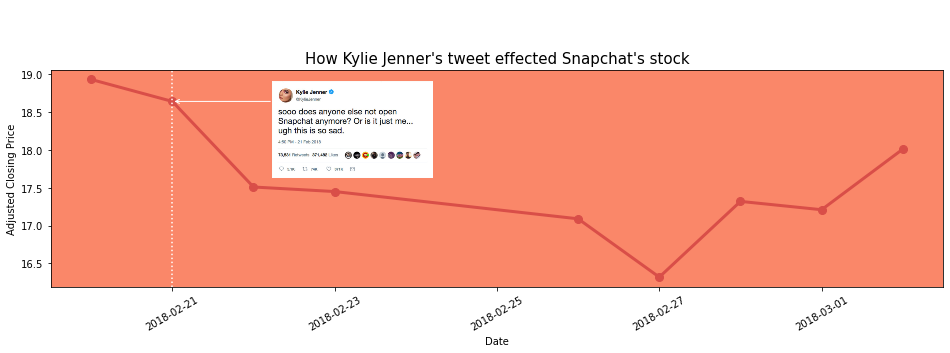

In [63]:
test_new_tweet("Sooo does anyone else not open Snapchat anymore? Or is it just me... ugh this is so sad,")
snap_data = get_data("SNAP", start_date = "02/20/2018", end_date = "03/3/2018", index_as_date=False)
fig = plt.figure()
fig, ax1 = plt.subplots(1)
my_plot(ax1, snap_data["date"], snap_data["adjclose"], "Date", "Adjusted Closing Price", "How Kylie Jenner's tweet effected Snapchat's stock", snap_data.iloc[1][0], snap_data.iloc[1][5], "kylie_jenner_tweet.png", [100, 20], [100, 0])

Tweet: ''We currently have a large position in APPLE. We believe the company to be extremely undervalued. Spoke to Tim Cook today. More to come.''
The tweet is negative


<Figure size 1152x432 with 0 Axes>

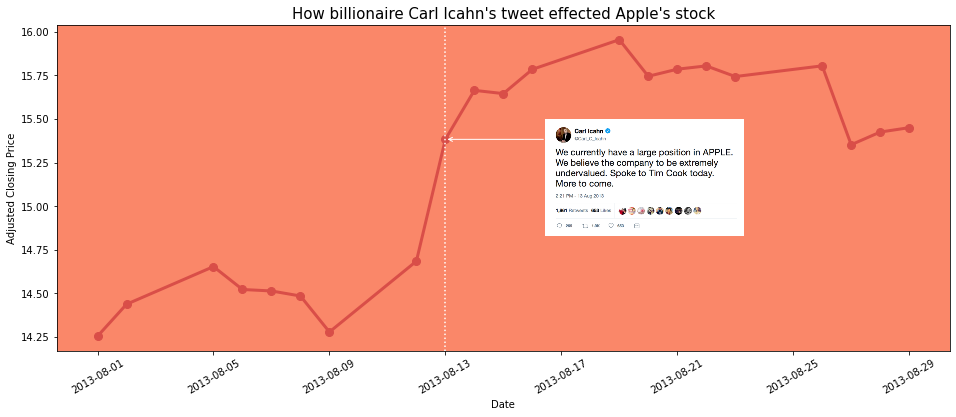

In [64]:
test_new_tweet("We currently have a large position in APPLE. We believe the company to be extremely undervalued. Spoke to Tim Cook today. More to come.")
appl_data = get_data("AAPL", start_date = "08/1/2013", end_date = "08/30/2013", index_as_date=False)
fig = plt.figure()
fig, ax1 = plt.subplots(1)
my_plot(ax1, appl_data["date"], appl_data["adjclose"], "Date", "Adjusted Closing Price", "How billionaire Carl Icahn's tweet effected Apple's stock", appl_data.iloc[8][0], appl_data.iloc[8][5], "carl_icahn_tweet.png", [100, 20], [100, 0])